# Preparação e Exploração de Dados


## Introdução ao Pandas: Leitura, Manipulação de Dados


O Pandas é uma biblioteca essencial para análise de dados em Python, oferecendo estruturas de dados flexíveis para carregar, manipular e limpar informações de forma eficiente.

**Estruturas de Dados no Pandas**

O Pandas trabalha com duas principais estruturas: **Series** e **DataFrames**.


### Series (Coluna única de dados)

Uma Series é uma estrutura de dados unidimensional que armazena valores com um índice associado.


In [1]:
import pandas as pd

# Criando uma Series
valores = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
print(valores)


a    10
b    20
c    30
d    40
e    50
dtype: int64


In [2]:
print(valores['c'])  # Saída: 30

30


### DataFrame (Tabela Estruturada de Dados)

Um DataFrame é uma estrutura bidimensional com múltiplas colunas, semelhante a uma planilha do Excel.

Criando um DataFrame manualmente:


In [3]:
dados = {'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniela'],
         'Idade': [25, 30, 35, 40],
         'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba']}

df = pd.DataFrame(dados)
print(df)


      Nome  Idade          Cidade
0      Ana     25       São Paulo
1    Bruno     30  Rio de Janeiro
2   Carlos     35  Belo Horizonte
3  Daniela     40        Curitiba


Podemos acessar colunas específicas:

In [4]:
df['Nome']

,Nome
0,Ana
1,Bruno
2,Carlos
3,Daniela


Ou acessar múltiplas colunas ao mesmo tempo:

In [6]:
df[['Nome', 'Cidade']]

,Nome,Cidade
0,Ana,São Paulo
1,Bruno,Rio de Janeiro
2,Carlos,Belo Horizonte
3,Daniela,Curitiba


## Leitura e Escrita de Arquivos

Leitura de Arquivos CSV:



```
df = pd.read_csv('dados.csv')
print(df.head())  # Exibe as primeiras 5 linhas
```



Leitura de Arquivos Excel:



```
df = pd.read_excel('dados.xlsx', sheet_name='Planilha1')
```



Escrita de Arquivos:



```
df.to_csv('novo_arquivo.csv', index=False)  # Salva sem o índice
df.to_excel('novo_arquivo.xlsx', index=False)


```



## Manipulação de Dados

**Seleção de Linhas e Colunas**

<br/>
Podemos também selecionar linhas específicas usando .iloc[] (índice numérico) ou .loc[] (índice nomeado).


In [8]:
# Selecionando a primeira linha
df.iloc[0]


,0
Nome,Ana
Idade,25
Cidade,São Paulo


In [9]:
# Selecionando um intervalo de linhas
df.iloc[1:3]


,Nome,Idade,Cidade
1,Bruno,30,Rio de Janeiro
2,Carlos,35,Belo Horizonte


### Filtrando Dados



Podemos criar filtros para extrair informações específicas:

In [10]:
# Filtrar pessoas com idade maior que 30
df_filtrado = df[df['Idade'] > 30]
print(df_filtrado)


      Nome  Idade          Cidade
2   Carlos     35  Belo Horizonte
3  Daniela     40        Curitiba


Podemos combinar filtros usando & (E) e | (OU):

In [11]:
df_filtrado = df[(df['Idade'] > 30) & (df['Cidade'] == 'Belo Horizonte')]

### Adicionando e Removendo Colunas


In [12]:
# Criando uma nova coluna com base em outra
df['Idade_Em_5_Anos'] = df['Idade'] + 5
print(df)


      Nome  Idade          Cidade  Idade_Em_5_Anos
0      Ana     25       São Paulo               30
1    Bruno     30  Rio de Janeiro               35
2   Carlos     35  Belo Horizonte               40
3  Daniela     40        Curitiba               45


 Removendo colunas:

In [13]:
df.drop(columns=['Idade_Em_5_Anos'], inplace=True)

Removendo linhas:

In [14]:
df.drop(index=2, inplace=True)  # Remove a linha com índice 2


### Transformação de Dados

Identificar Valores Ausentes:

In [15]:
df['Nome'] = df['Nome'].str.upper()  # Converte para maiúsculas
df['Cidade'] = df['Cidade'].str.replace(' ', '_')  # Substitui espaços por _

Criando categorias para variáveis textuais:

In [16]:
df['Cidade_Codificada'] = df['Cidade'].astype('category').cat.codes

In [17]:
df

,Nome,Idade,Cidade,Cidade_Codificada
0,ANA,25,São_Paulo,2
1,BRUNO,30,Rio_de_Janeiro,1
3,DANIELA,40,Curitiba,0


## Tratamento de valores ausentes e outliers

* Em análise de dados, lidar com valores ausentes e outliers é fundamental para garantir a qualidade e confiabilidade das análises.

* Valores ausentes podem distorcer estatísticas e previsões, enquanto outliers podem indicar erros, anomalias ou informações valiosas.


### Identificação de Valores Ausentes


Primeiro, vamos identificar os valores ausentes em um DataFrame:


In [18]:
import pandas as pd

# Exemplo de DataFrame com valores ausentes
data = {'A': [1, 2, None, 4], 'B': [None, 2, 3, 4]}
df = pd.DataFrame(data)

# Identificando valores ausentes
print(df.isnull())
print(df.isnull().sum())


       A      B
0  False   True
1  False  False
2   True  False
3  False  False
A    1
B    1
dtype: int64


### Tratamento de Valores Ausentes

Existem várias estratégias para tratar valores ausentes, incluindo a remoção ou imputação dos dados ausentes.

Remoção de linhas ou colunas com valores ausentes:

In [22]:
# Remover linhas com valores ausentes
df_dropped = df.dropna()
print(df_dropped)



     A    B
1  2.0  2.0
3  4.0  4.0


In [23]:
# Remover colunas com valores ausentes
df_dropped_columns = df.dropna(axis=1)
print(df_dropped_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


Prós:

* **Simplicidade**: Fácil de implementar.

* **Integridade dos Dados Restantes**: Apenas dados completos são mantidos.

<br>
Contras:

* **Perda de Dados**: Pode levar à perda significativa de informações se muitas linhas tiverem valores ausentes.

* **Viés**: A remoção pode introduzir viés se os dados ausentes não forem aleatórios.

#### Imputação de Valores Ausentes



Imputar com a Média:

In [24]:
# Imputar valores ausentes com a média da coluna
df_mean = df.fillna(df.mean())
print("\nDataFrame após imputação com a média:")
print(df_mean)



DataFrame após imputação com a média:
          A    B
0  1.000000  3.0
1  2.000000  2.0
2  2.333333  3.0
3  4.000000  4.0


**Prós**:

* Preserva o Tamanho do Conjunto de Dados: Nenhuma linha é removida.

* **Simplicidade**: Fácil de calcular e implementar.

<br>

**Contras**:

* **Viés Estatístico**: Pode distorcer a distribuição original dos dados.

* **Ignora Variabilidade**: Não considera a variabilidade dos dados.

Imputar com Valor Fixo:

In [25]:
# Imputar valores ausentes com um valor fixo (por exemplo, 0)
df_fixed = df.fillna(0)
print("\nDataFrame após imputação com valor fixo:")
print(df_fixed)



DataFrame após imputação com valor fixo:
     A    B
0  1.0  0.0
1  2.0  2.0
2  0.0  3.0
3  4.0  4.0


**Prós**:

* **Simplicidade**: Fácil de implementar.

* **Uniformidade**: Útil se o valor ausente representar ausência de quantidade.

<br>

**Contras**:

* **Distorção de Dados**: Pode não fazer sentido para todas as variáveis.

* **Introdução de Viés**: Pode afetar estatísticas como média e desvio padrão.

### Tratamento de Outliers

Outliers são valores que diferem significativamente de outros em um conjunto de dados. Eles podem resultar de erros de medição ou podem ser observações legítimas, mas extremas.


#### Identificação de Outliers


##### **Box Plot (Diagrama de Caixa)**


O box plot é uma ferramenta gráfica que permite visualizar a distribuição dos dados e identificar outliers.


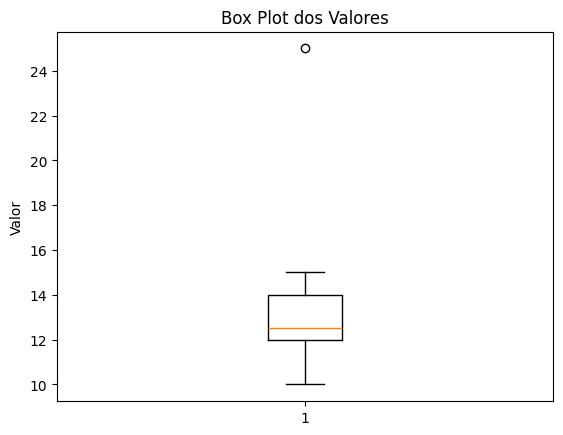

In [26]:
import matplotlib.pyplot as plt

# Exemplo de dados
data_outliers = {
    'Valores': [10, 12, 12, 13, 12, 14, 25, 12, 15, 14, 13, 12]
}
df_outliers = pd.DataFrame(data_outliers)

# Gerar box plot
plt.boxplot(df_outliers['Valores'])
plt.title('Box Plot dos Valores')
plt.ylabel('Valor')
plt.show()


**Boxplot Interpretação:**

* **Quartis:** O box plot mostra o primeiro quartil (Q1), mediana (Q2) e terceiro quartil (Q3).

* **Outliers**: Valores além de 1,5 vezes o IQR (Intervalo Interquartil) são considerados outliers e são representados como pontos individuais.


**Cálculo do IQR**

In [27]:
# Cálculo dos quartis
Q1 = df_outliers['Valores'].quantile(0.25)
Q3 = df_outliers['Valores'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers = df_outliers[(df_outliers['Valores'] < limite_inferior) |
                       (df_outliers['Valores'] > limite_superior)]
print("\nOutliers identificados:")
print(outliers)


Outliers identificados:
   Valores
6       25


**Remoção de Outliers**

In [29]:
# Remover outliers
df_sem_outliers = df_outliers[(df_outliers['Valores'] >= limite_inferior) \
                              & (df_outliers['Valores'] <= limite_superior)]
print("\nDataFrame sem outliers:")
print(df_sem_outliers)



DataFrame sem outliers:
    Valores
0        10
1        12
2        12
3        13
4        12
5        14
7        12
8        15
9        14
10       13
11       12


**Prós:**

* **Simplicidade:** Fácil de implementar.

* **Redução do Impacto Negativo:** Outliers não afetam mais as análises.

**Contras:**

* **Perda de Dados:** Pode remover dados importantes.

* **Possível Viés:** Se os outliers forem legítimos, a remoção pode distorcer os resultados.

**Imputação de Outliers:**
Substituir Outliers pelos Limites

In [31]:
# Substituir outliers pelos limites superior e inferior
import numpy as np

df_capped = df_outliers.copy()
df_capped['Valores'] = np.where(df_capped['Valores'] > limite_superior, limite_superior,
                                np.where(df_capped['Valores'] < limite_inferior, limite_inferior, df_capped['Valores']))
print("\nDataFrame após capear os outliers:")
print(df_capped)



DataFrame após capear os outliers:
    Valores
0      10.0
1      12.0
2      12.0
3      13.0
4      12.0
5      14.0
6      17.0
7      12.0
8      15.0
9      14.0
10     13.0
11     12.0


**Prós:**

* **Preserva o Tamanho do Conjunto de Dados:** Nenhuma linha é removida.

* **Reduz o Impacto dos Outliers:** Limita os valores extremos.

**Contras:**

* **Distorção de Dados:** Pode introduzir valores artificiais.

* **Afeta Estatísticas:** Pode influenciar medidas como média e desvio padrão.

## Análise exploratória de dados (EDA) com visualizações


A Análise Exploratória de Dados (EDA) é uma etapa fundamental para entender os dados, identificar padrões, detectar outliers e formular hipóteses. Neste material, vamos focar no uso de visualizações gráficas para explorar os dados, entender relações entre variáveis e levantar hipóteses.


**Carregando dataset para Análise:**

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o Iris Dataset
df = sns.load_dataset('iris')

# Visualizar as primeiras linhas
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Histograma

O histograma é ideal para visualizar a distribuição de uma variável contínua.


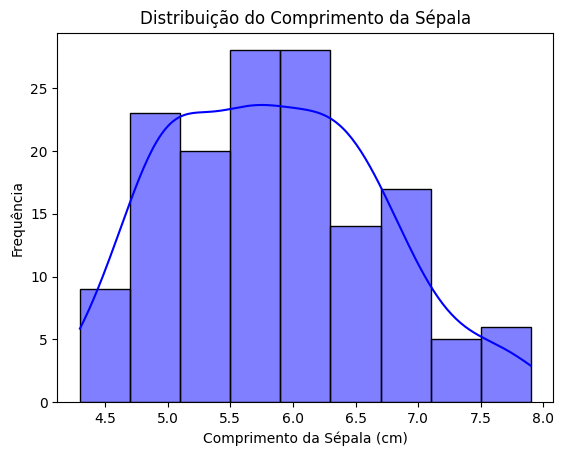

In [33]:
# Histograma do comprimento da sépala (sepal_length)
sns.histplot(df['sepal_length'], kde=True, color='blue')
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

### Boxplot

O boxplot ajuda a identificar outliers e entender a dispersão dos dados.


<ipython-input-34-0bc557dfe522>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=df, palette='Set2')


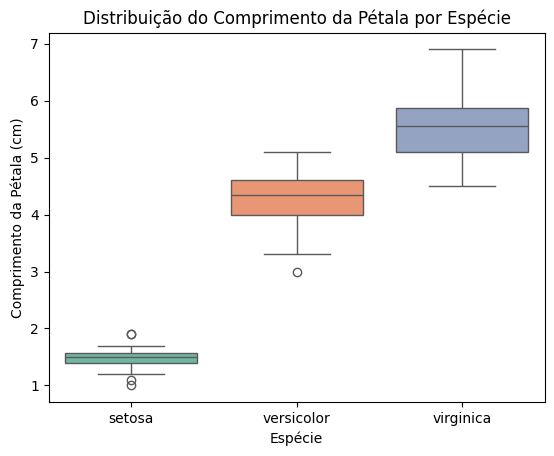

In [34]:
# Boxplot do comprimento da pétala (petal_length) por espécie
sns.boxplot(x='species', y='petal_length', data=df, palette='Set2')
plt.title('Distribuição do Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

### Gráfico de Dispersão (Scatter Plot)


O scatter plot é usado para visualizar a relação
entre duas variáveis contínuas.


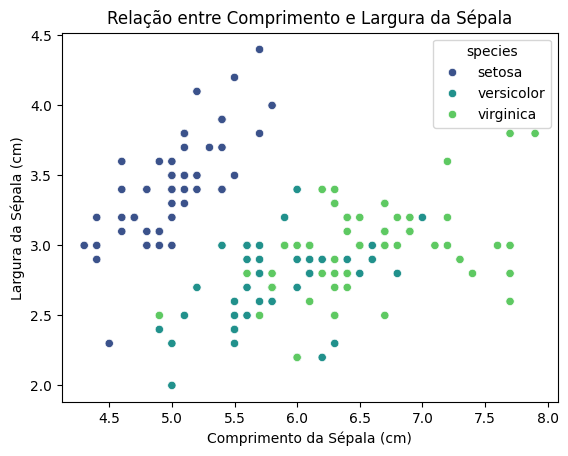

In [35]:
# Scatter plot entre comprimento da sépala e largura da sépala
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='viridis')
plt.title('Relação entre Comprimento e Largura da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.show()

###  Pairplot

O pairplot é uma ótima ferramenta para visualizar correlações e distribuições entre várias variáveis ao mesmo tempo.


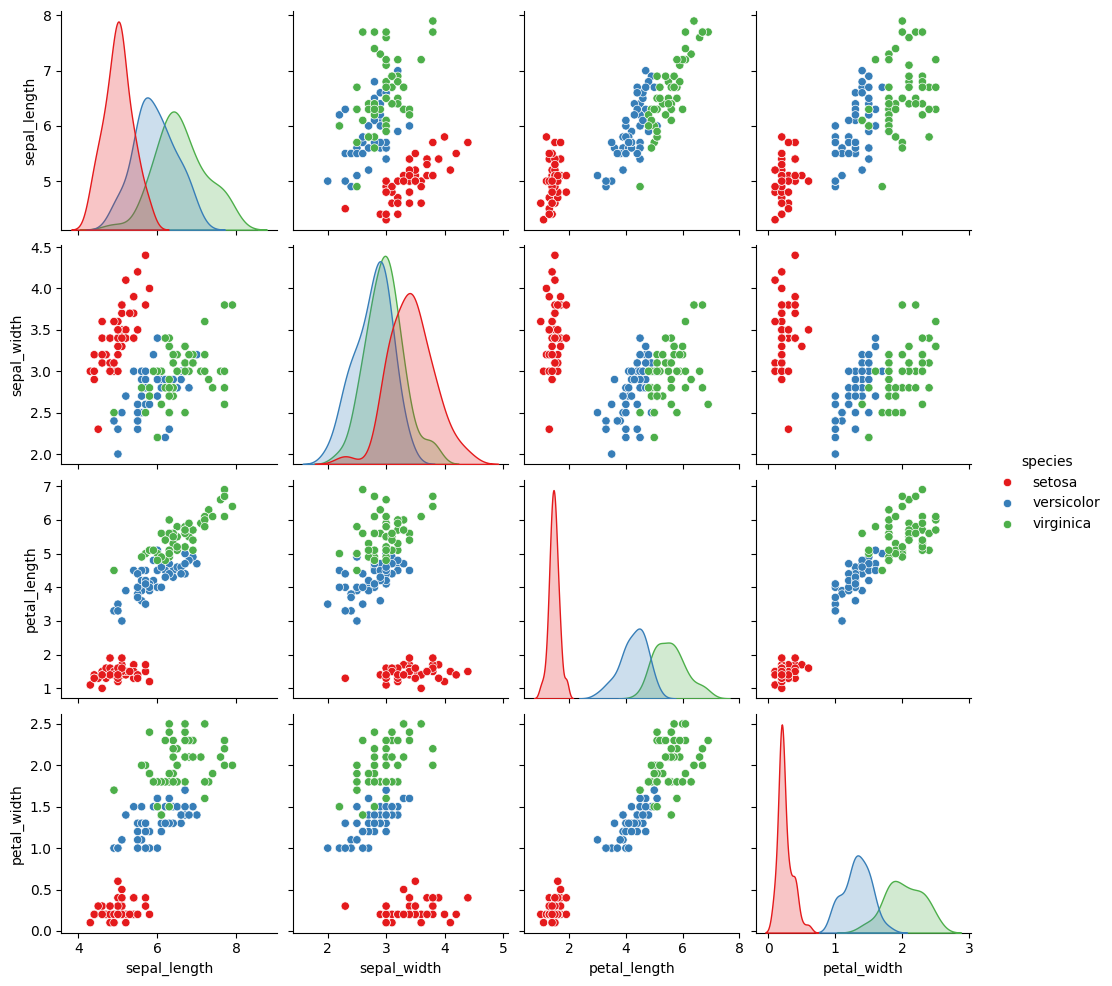

In [36]:
# Pairplot para todas as variáveis, colorido por espécie
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

### Matriz de correlação


A correlação mede a relação linear entre duas variáveis. Podemos visualizá-la com uma matriz de correlação ou um heatmap.


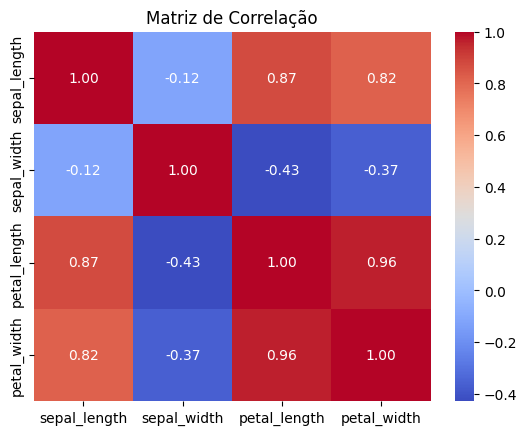

In [37]:
# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
corr = df_numeric.corr()

# Visualizar a matriz de correlação com um heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Hipóteses Levantadas (Baseado nas Visualizações)


* **Hipótese 1:** Existe uma relação positiva entre o comprimento da sépala e o comprimento da pétala? (Scatter plot e correlação).

* **Hipótese 2:** A espécie Setosa tem medidas de pétalas significativamente menores que as outras espécies? (Boxplot e violin plot).

* **Hipótese 3:** Há uma clara separação entre as espécies com base nas medidas das sépalas e pétalas? (Pairplot).
